# ODEs: Higher order IVP

* EE and IE are simple, but low order: globally first order.
    * To get high accuracy requires many more steps: smaller $\Delta t$.
    * Higher order methods give the same accuracy for larger step sizes.




## Second order methods

ODE:
$$\frac{dy}{dt} = f(y,t),$$
$$y(t=0) = y_0.$$



### Modified midpoint (MM) method

* EE takes a step from $k$ to $k+1$ using the slope at point $k$.
* IE takes a step from $k$ to $k+1$ using the slope at point $k+1$.
* MM takes a step from $k$ to $k+1$ using the slope at point $k+1/2$.
    * To get to $k+1/2$ so that we can evaluate the slope there, take a trial EE step to that point
    
<font color='blue'>
$$y_{k+1/2} = y_k + \frac{\Delta t}{2}f(y_k,t_k).$$
$$y_{k+1}   = y_k + \Delta tf(y_{k+1/2},t_{k+1/2}).$$
</font>

* So, on each step we first evaluate $y_{k+1/2}$ using EE for a half step. Then we take the real full step using the slope at $y_{k+1/2}$.

#### Taylor series representation
* Write two Taylor series approximations for $y_{k+1}$ and $y_k$ centered on $y_{k+1/2}$.
$$y_{k+1} = y_{k+1/2} + y^{\prime}_{k+1/2}\frac{\Delta t}{2} + \frac{1}{2}y^{\prime\prime}_{k+1/2}\left(\frac{\Delta t}{2}\right)^2+\frac{1}{6}y^{\prime\prime\prime}_{k+1/2}\left(\frac{\Delta t}{2}\right)^3\ldots,$$
$$y_{k} = y_{k+1/2} - y^{\prime}_{k+1/2}\frac{\Delta t}{2} + \frac{1}{2}y^{\prime\prime}_{k+1/2}\left(\frac{\Delta t}{2}\right)^2-\frac{1}{6}y^{\prime\prime\prime}_{k+1/2}\left(\frac{\Delta t}{2}\right)^3\ldots,$$
* Subtract the second equation from the first and solve for $y_{k+1}$.
$$y_{k+1} = y_k + \Delta t y^{\prime}_{k+1/2} + \mathcal{O}(\Delta t^3).$$
* The method is globally $\mathcal{O}(\Delta t^2)$.
* Note, $y^{\prime}_{k+1/2} \equiv f(y_{k+1/2},t_{k+1/2}).$
* Note, this analysis was done using $y_{k+1/2}$, but the actual method doesn't use $y_{k+1/2}$, it uses the EE approximation to this value, so we really have
$$y_{k+1} = y_k + \Delta t (y^{\prime}_{k+1/2}+\mathcal{O}(\Delta t^2)) + \mathcal{O}(\Delta t^3),$$
where the $\mathcal{O}(\Delta t^2)$ term is the local error of the EE method. When we expand this we get  
$$y_{k+1} = y_k + \Delta t y^{\prime}_{k+1/2}+\mathcal{O}(\Delta t^3) + \mathcal{O}(\Delta t^3) = y_k + \Delta ty^{\prime}_{k+1/2}+\mathcal{O}(\Delta t^3),$$
so there is no overall change in the global order of the method.

### Implicit trapazoid (IT) method
* From the MM method:
$$ y_{k+1} = y_k + \Delta t y^{\prime}_{k+1/2} = y_k + \Delta t f_{k+1/2}.$$
* Evaluate 
$$f_{k+1/2} = \frac{1}{2}(f_k + f_{k+1}).$$
* Hence,
<font color='blue'>
$$y_{k+1} = y_k + \Delta t\frac{f(y_k,t_k) + f(y_{k+1},t_{k+1})}{2}.$$
</font>
* This method is globally $\mathcal{O}(\Delta t^2)$ accurate.
* Note how and why the method is implicit.
* Note, this method can also be written as EE from $k$ to $k+1/2$ followed by IE from $k+1/2$ to $k+1$:
$$y_{k+1/2} = y_k + \frac{\Delta t}{2}f_k,$$
$$y_{k+1} = y_{k+1/2} + \frac{\Delta t}{2}f_{k+1}.$$



### Modified Euler (ME) method
* This is like the IT method, but get $f_{k+1}$ from a full EE step:
<font color='blue'>
$$ y^*_{k+1} = y_k + \Delta t f_k,$$
$$ y_{k+1} = y_k + \Delta t \frac{f(y_k,t_k) + f(y_{k+1}^*,t_{k+1})}{2}.$$
</font>
* This is a two-step **predictor-corrector** method. We predict the answer using EE in the first step, then using this result, we improve (correct) the answer in the second step.
* This method is globally $\mathcal{O}(\Delta t^2)$ accurate.

## Runge Kutta (RK) methods

\begin{align*}
y_{k+1} = y_k + &hS, \\
& S = c_1S_1 + c_2S_2 + c_3S_3 + \ldots.
\end{align*}

* Here, let $h\equiv\Delta t$
* $S$ is a slope $dy/dt$, evaluated from $f(y,t)$ or from a combination of $f(y,t)$ evaluated at various points $y$ in different ways. 
    * The $c_i$ above are coefficients of the linear combination.
* Here, we will ignore the time dependence of $f$ for simplicity and clarity.

### Second order
\begin{align*}
y_{k+1} = &y_k + h(c_1S_1 + c_2S_2), \\
&S_1 = f(y_k), \\
&S_2 = f(y_k + \beta hS_1).
\end{align*}
* So, we are taking linear combinations of $h$ times the slopes evaluated at different points.
* Note in the second equation we evaluate the slope at a later time. We get to that time by taking an Euler-like step $y_k+\beta hS_1$.
* Combine the above equations:
<font color='blue'>
$$ y_{k+1} = y_k + c_1hf(y_k) + c_2hf(y_k+\beta hS_1).$$
</font>


* Again (for slides display): 
<font color='blue'>
$$ y_{k+1} = y_k + c_1hf(y_k) + c_2hf(y_k+\beta hS_1).$$
</font>

* This equation contains parts at point $k$ and a part at a later time, $f(y_k+\beta hS_1)$.
    * Note that $\beta hS_1 = \beta hf_k$.
* We can write all parts at point $k$ by expanding $f(y_k+\beta hS_1)$ in a Taylor series about point $k$:
\begin{align}
f(y_k+\beta\Delta y_1) &= f_k + \left.\frac{\partial f}{\partial y}\right|_k\beta hS_1 + \mathcal{O}(h^2), \\
&= f_k + \beta h f_{y,k} f_k + \mathcal{O}(h^2),\\
\end{align}
where $f_{y,k}$ is the derivative of $f$ with respect to $y$ evaluated at point $k$.

* Hence,
<font color='green'>
$$ y_{k+1} = y_k + f_k h(c_1+c_2) + \beta h^2c_2f_{y,k}f_k + \mathcal{O}(h^3).$$
</font>



* Now, we will take a Taylor series of $y_{k+1}$ and compare it with the above green equation.
\begin{align}
y_{k+1} &= y_k + y_k^{\prime}h + \frac{1}{2} y_k^{\prime\prime}h^2 + \mathcal{O}(h^3),\\
&= y_k + f_kh + \frac{1}{2}h^2(y^{\prime})^{\prime}_k + \mathcal{O}(h^3).
\end{align}
    * Now, $$(y^{\prime})^{\prime} = \left.\frac{\partial f}{\partial t}\right|_k = \left.\frac{\partial f}{\partial y}\frac{dy}{dt}\right|_k = f_{y,k}f_k.$$
    * Hence:
    <font color='red'>
    $$y_{k+1} = y_k + f_kh + \frac{1}{2}h^2f_{y,k}f_k + \mathcal{O}(h^3).$$
    </font>

* Again, the green equation above is:
<font color='green'>
$$ y_{k+1} = y_k + f_k h(c_1+c_2) + \beta h^2c_2f_{y,k}f_k + \mathcal{O}(h^3).$$
</font>

* Comparing the green and red equations imples:
<font color='blue'>
$$ (c_1+c_2) = 1, $$
$$\beta c_2 = \frac{1}{2}.$$
</font>
* So, in choosing our second order RK method, we have one degree of freedom. Choose, say, $c_1$, then $c_2 = 1-c_1$, and then $\beta = 1/2c_2.$
    * There are an infinite number of possible second order methods.



### Example
Recall our 2nd order method:
\begin{align*}
y_{k+1} = &y_k + h(c_1S_1 + c_2S_2), \\
&S_1 = f(y_k), \\
&S_2 = f(y_k + \beta hS_1).
\end{align*}

* Let $c_1 = 1/2$, then $c_2=1/2$ and $\beta = 1$.
$$y_{k+1} = y_k + \frac{h}{2}(f(y_k) + f(y_k+hf(y_k))$$
* This is the ME method.

### Fourth order RK method (*The* RK method)

\begin{align*}
y_{k+1} &= y_k + h\left(\frac{1}{6}S_1 + \frac{2}{6}S_2 + \frac{2}{6}S_3 + \frac{1}{6}S_4\right),\\
& S_1 = f(y_k), \\
& S_2 = f(y_k+\frac{h}{2}S_1), \\
& S_3 = f(y_k+\frac{h}{2}S_2), \\
& S_4 = f(y_k+hS_3). 
\end{align*}

<img src="https://ignite.byu.edu/che541/lectures/figs/l13f01.png" width="250">

### Approach
* Evaluate the slope $S_1$ at $y_k$.
* Take a half step EE from point $k$ to $k+1/2$ using slope $S_1$. 
    * Evaluate $S_2$ here.
* Take a half step EE from point $k$ to $k+1/2$ using slope $S_2$. 
    * Evaluate $S_3$ here.
* Take a full step EE from point $k$ to $k+1$ using slope $S_3$. 
    * Evaluate $S_4$ here.
* Take the final full step using a linear combination of the slopes:
$$y_{k+1} = y_k + \frac{h}{6}(S_1 + 2S_2 + 2S_3+ S_4).$$
* Note how values of $y$ at intermediate step are used to compute slopes for following steps.
* For $n^{th}$ order with $n\le 4$ $\rightarrow$ $n$ function evaluations are required.
* For $>4^{th}$ order $\rightarrow$ more than $n$ function evaluations required. (Storage costs too).
* $\rightarrow$ the $4^{th}$ order method gives the most bang for the buck.

### RK4 code
* Solve $dy/dt = -y$ from $t=0$ to $t=5$ with RK4 and EE. Use 10 steps, so $\Delta t = 0.5$. Let $y_0=1$.

In [8]:
import Plots as plt

In [21]:
function odeRK4(f, y0, t)
    ns = length(t)-1
    y = zeros(ns+1)
    y[1] = y0
    
    for k in 1:ns
        h = t[k+1]-t[k]
        S1 = f(y[k],t[k])
        S2 = f(y[k]+0.5*h*S1, t[k]+0.5*h)
        S3 = f(y[k]+0.5*h*S2, t[k]+0.5*h)
        S4 = f(y[k]+    h*S3, t[k]+    h)
        y[k+1] = y[k] + h/6*(S1 + 2*S2 + 2*S3 + S4)
    end
        
    return y
end

odeRK4 (generic function with 1 method)

In [22]:
function odeEE(f, y0, t)
    ns = length(t)-1
    y = zeros(ns+1)
    y[1] = y0
    
    for k in 1:ns
        h = t[k+1]-t[k]
        y[k+1] = y[k] + h*f(y[k],t[k])
    end
    
    return y
end

odeEE (generic function with 1 method)

In [23]:
f(y,t) = -y

#----------------------

y0    = 1.0
tend  = 5.0
t     = LinRange(0,tend,11)

#----------------------

y_RK4 = odeRK4(f,y0,t)
y_EE  = odeEE(f,y0,t)

tt      = LinRange(0,tend,100)
y_Exact = exp.(-tt);


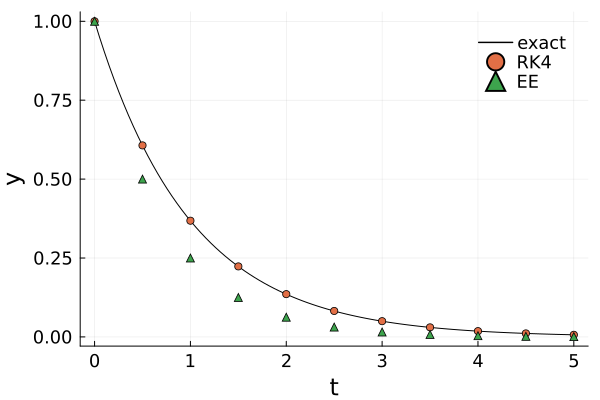

In [24]:
plt.resetfontsizes(); plt.scalefontsizes(1.5)
plt.plot(tt,y_Exact, label="exact", color="black")
plt.scatter!(t, y_RK4, label="RK4")
plt.scatter!(t, y_EE, label="EE", markershape=:utriangle)
plt.plot!(background_color_legend=nothing, foreground_color_legend=nothing)
plt.plot!(ylabel="y", xlabel="t")